[View in Colaboratory](https://colab.research.google.com/github/mmerc/MSDS686-Seedlings-Classification-CNN/blob/master/Final_Project.ipynb)

#  Regis University MSDS 686 Deep Learning Course Project
##By:  Maria Mercier
### October 20, 2018

# Introduction

This paper decribes the process for developing and comparing convolutional neural networks (CNN) in a classification problem for a deep learning course. The data used in this project is the "Plant Seedling Data" from a Kaggle competition. The goal of the classification problem is to predict the species of plant seedling based on images.

The process for this project includes several components.  The plant seedling training and testing data were obtained from the Kaggle website and loaded in Colab for processing.  The Kaggle images are "labeled" by placement of each image in a folder with the designated label.  The images were retrieved from these folders, placed into an array with the name of the folder set as the "label."  Once the images are obtained, the training data is separated into images and labels. The training data is then processed as input for CNN in Keras.  

Six CNN models were tested and compared to identify the most accurate model to use for the Kaggle submission.  I included six of the many models I tried to compare the results of models with a simple architecture (fewer parameters) to those models with complex architecture (larger number of parameters).  Most of the code for this project was modified from NikKonst (2018) which along with the Chollett (2018 )textbook served as a guide for the entire process.  Helpful information was also obtained from classmates posting their experiences on the course discussion board.

The project was performed on Colab's tensorflow deep learning software running on Google's Graphic Processing Unit.  

Although model2 had the second best baseline error rate,  it was used for the Kaggle submission due to little overfitting which hopefully would generalize well to new data.  The Kaggle submission achieved a score of 0.89.


# Load Data into Colab

The data set was obtained from Kaggle (2018).  It was then uploaded to Google Drive via the intructions on CoLab Drive FUSE example.ipynb (2018).  

In [0]:

from google.colab import drive

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# check to see that the test and training folders with the seedling data is present in Colab
!ls "/content/drive/My Drive/DLproject/seedlingsToColab"

res.csv  test  train


# Import Libraries

In [4]:
# import needed libraries
import os as os
from PIL import Image
from array import array
import cv2 as cv2
from glob import glob
import time
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

from keras.utils import np_utils
from sklearn import preprocessing

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras import optimizers
from keras.optimizers import Adam
from keras import regularizers
from keras import layers
seed = 7
np.random.seed(seed)

# for API
from keras.models import Model
from keras.layers import Input, Concatenate, Dense, Dropout, Flatten, Activation

from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
from keras import backend as K

K.set_image_dim_ordering( 'tf' )


Using TensorFlow backend.


# Organize Data 

The follow code establishes the paths to the train and test data.  The training data was then divided into images and labels.  The code for this step was compiled from NikKonst (2018).

In [0]:
pathToTrain = "/content/drive/My Drive/DLproject/seedlingsToColab/train/"
testPath = "/content/drive/My Drive/DLproject/seedlingsToColab/test/"

In [6]:


listing = os.listdir( pathToTrain ) 
num_folders = len(listing)
print ( num_folders)
trainArray = [[]]
trainImagesPaths = []
trainImagesCategories = []
trainImg = []
scaleTo = 71
seed = 7

t0=time.time()

for imgFolder in listing:
  print(imgFolder)
  path = "/content/drive/My Drive/DLproject/seedlingsToColab/train/" + imgFolder + '/'
  files = os.listdir( path ) 
  for imgFile in files:
    imgPath = path + imgFile
    trainArray.append([imgPath, imgFolder]) # image path, image folder
    trainImagesPaths.append(imgPath) # paths to images
    trainImagesCategories.append(imgFolder) # labels
    
    trainImg.append(cv2.resize(cv2.imread(imgPath), (scaleTo, scaleTo))) # images
    
t1=time.time()
print(t1-t0," seconds")
  

12
Small-flowered Cranesbill
Sugar beet
Black-grass
Scentless Mayweed
Loose Silky-bent
Common Chickweed
Maize
Fat Hen
Shepherds Purse
Charlock
Common wheat
Cleavers
2405.1515510082245  seconds


In [7]:
trainImagesPaths[1] # gives the path to the first image

'/content/drive/My Drive/DLproject/seedlingsToColab/train/Small-flowered Cranesbill/5fa533084.png'

### Data Array Creation

In [0]:
trainImgNParray = np.asarray(trainImg) # create an array of all the images (not the paths)
trainlabel = pd.DataFrame(trainImagesCategories) # dataframe of all the categories matching each image

In [7]:
# check the length of the training images for confirmation
len(trainImgNParray)

4750

In [8]:
# check the length of labels for confirmation
len(trainlabel)

4750

In [0]:
# I tried this code which was suggested by one the classmates but it did not work for me.
# np.save('trainImgNParray1', trainImgNParray)

In [0]:
# print( os.getcwd() )
# print( os.listdir('trainImgNParray1') )

In [0]:
# this did not work for me.
# np.load('trainImgNParray1') 

In [18]:
# checking the shape of the first image.
trainImgNParray[1].shape

(71, 71, 3)

In [19]:
type(trainImgNParray) # verifing the data type

numpy.ndarray

In [20]:
len(trainImagesPaths)

4750

In [21]:
print(trainImagesPaths[0:5])

['/content/drive/My Drive/DLproject/seedlingsToColab/train/Small-flowered Cranesbill/ba08ca84c.png', '/content/drive/My Drive/DLproject/seedlingsToColab/train/Small-flowered Cranesbill/5fa533084.png', '/content/drive/My Drive/DLproject/seedlingsToColab/train/Small-flowered Cranesbill/42db489c6.png', '/content/drive/My Drive/DLproject/seedlingsToColab/train/Small-flowered Cranesbill/3ad4ad205.png', '/content/drive/My Drive/DLproject/seedlingsToColab/train/Small-flowered Cranesbill/39070241e.png']


### Display 12 images.

The next step was to display a few of the images to verify that they were read correctly.  The code for this step was taken from  NikKonst (2018).

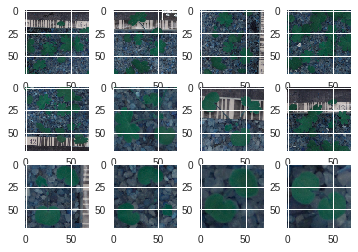

In [9]:
for i in range(12):
  plt.subplot(3,4, i+1)
  plt.imshow(trainImg[i])

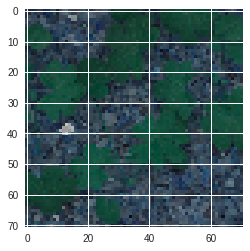

In [23]:
plt.imshow(trainImg[3])

In [24]:
im = trainImg[3]
im.shape

(71, 71, 3)

In [25]:
trainArray[7][0]

'/content/drive/My Drive/DLproject/seedlingsToColab/train/Small-flowered Cranesbill/ff07b2015.png'

In [26]:
trainArray[7][1]

'Small-flowered Cranesbill'

In [27]:
trainImgNParray.shape

(4750, 71, 71, 3)

In [28]:
trainlabel.shape

(4750, 1)

### Remove Background Images with Mask

Although we did not cover creating a mask in our course, this technique to remove the background images appeared to be helpful for isolating the image of the seedlings.  The code and comments for this step was taken from NikKonst (2018).

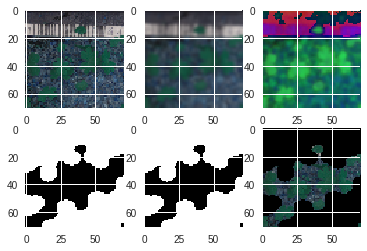

In [9]:
clearTrainImg = []
examples = []; getEx = True
for img in trainImgNParray:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)   
    
    # Convert to HSV image
    hsvImg = cv2.cvtColor(blurImg, cv2.COLOR_BGR2HSV)  
    
    # Create mask (parameters - green color range)
    lower_green = (25, 40, 50)
    upper_green = (75, 255, 255)
    mask = cv2.inRange(hsvImg, lower_green, upper_green)  
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    # Create bool mask
    bMask = mask > 0  
    
    # Apply the mask
    clear = np.zeros_like(img, np.uint8)  # Create empty image
    clear[bMask] = img[bMask]  # Apply boolean mask to the origin image
    
    clearTrainImg.append(clear)  # Append image without backgroung
    
    # Show examples
    if getEx:
        plt.subplot(2, 3, 1); plt.imshow(img)  # Show the original image
        plt.subplot(2, 3, 2); plt.imshow(blurImg)  # Blur image
        plt.subplot(2, 3, 3); plt.imshow(hsvImg)  # HSV image
        plt.subplot(2, 3, 4); plt.imshow(mask)  # Mask
        plt.subplot(2, 3, 5); plt.imshow(bMask)  # Boolean mask
        plt.subplot(2, 3, 6); plt.imshow(clear)  # Image without background
        getEx = False

clearTrainImg = np.asarray(clearTrainImg)

### Prepare The Data

The process for preparing the data included, normalization, encoding, and categorizing the labels from the folders.  The code for preparing the data was taken from  NikKonst (2018).


In [0]:
# normalize the training data
clearTrainImg = clearTrainImg/255

Classes: ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']
Number of classes: 12


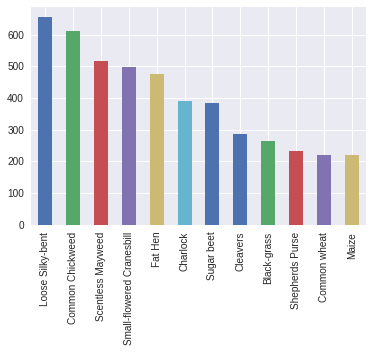

In [11]:
# Encode labels and create classes
le = preprocessing.LabelEncoder()
le.fit(trainlabel[0])
print("Classes: " + str(le.classes_))
encodeTrainLabels = le.transform(trainlabel[0])

# Make labels categorical
clearTrainLabel = np_utils.to_categorical(encodeTrainLabels)
num_clases = clearTrainLabel.shape[1]
print("Number of classes: " + str(num_clases))

# Plot of label types numbers
trainlabel[0].value_counts().plot(kind='bar')

The above chart shows that there are different quantities of data in each label.  This is important to know to set up the training and validation sets.  The training and validation sets will be stratified according to the quantity for each label.

In [32]:
# check the data type of the training images
clearTrainImg.dtype

dtype('float64')

In [0]:
# I converted the training images to float 32 but this had negative affects on the models performances. So, the images were left as float 64.
# clearTrainImg = clearTrainImg.astype('float32')

In [33]:
clearTrainLabel.dtype

dtype('float32')

### Training and Validation Sets

In [0]:
from sklearn.model_selection import train_test_split
# I used a 90% - 10% test train split, stratified according to training labels.  The code is from NikKonst (2018)
trainX, testX, trainY, testY = train_test_split(clearTrainImg, clearTrainLabel, 
                                                test_size=0.10, random_state=seed, 
                                                stratify = clearTrainLabel)

The next several lines of code are checking the shape and data type of the training and test (validation) sets.

In [14]:
trainX.shape

(4275, 71, 71, 3)

In [15]:
type(trainX)

numpy.ndarray

In [37]:
testX.shape

(475, 71, 71, 3)

In [38]:
type(testX)

numpy.ndarray

In [39]:
trainY.shape

(4275, 12)

In [40]:
type(trainY)

numpy.ndarray

In [41]:
testY.shape

(475, 12)

In [148]:
type(testY)

numpy.ndarray

The training and testing/validation sets appear to be the correct shape and data type.

### Data Generator

According to NikKonst (2018), the data generator is utilized to prevent overfitting.   Data augmentation is configured in the image generator  which will randomly rotate,  shift, zoom and flip image during the fitting of the model.  The generator is set as follows  NikKonst (2018):

Set random rotation from 0 to 180 degrees

Set random zoom at 0.1

Set random shifting at 0.1

Set horisontal and vertical flips

In [0]:
# code taken from NikKonst (2018) at https://www.kaggle.com/nikkonst/plant-seedlings-with-cnn-and-image-processing
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=180,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically 
        horizontal_flip=True,  # randomly flip images horizontally
        vertical_flip=True  # randomly flip images vertically
    )  
datagen.fit(trainX)

# CNN Models

I compared six CNN models from various sources and one I created myself.

## model_A from Chollet 

The experimentation began with a small CNN from Chollet (2018).  This model has 4 conv layers, each followed by a maxpooling layer and 2 dense layers.  There is no dropout or batch normalization.

In [43]:
# second model with 4 conv layers taken from Chollet, (2018), page 134.
model = Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(scaleTo, scaleTo, 3))) 
model.add(layers.MaxPooling2D((2, 2))) # to downsample the feature maps
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten()) 
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_clases, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_A = model
model_A.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 69, 69, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 128)         147584    
__________

In [44]:
t0=time.time()
history_A = model_A.fit_generator(datagen.flow(trainX, trainY, batch_size=75), epochs=35, validation_data=(testX, testY), verbose=2)
t1=time.time()
print(t1-t0," seconds")

# Final evaluation of the model
scores = model_A.evaluate(testX, testY, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/35
 - 9s - loss: 2.0863 - acc: 0.2667 - val_loss: 1.7924 - val_acc: 0.3347
Epoch 2/35
 - 7s - loss: 1.7706 - acc: 0.3640 - val_loss: 1.6580 - val_acc: 0.3958
Epoch 3/35
 - 7s - loss: 1.6052 - acc: 0.4218 - val_loss: 1.4579 - val_acc: 0.4758
Epoch 4/35
 - 7s - loss: 1.4172 - acc: 0.5074 - val_loss: 1.2801 - val_acc: 0.5642
Epoch 5/35
 - 7s - loss: 1.2844 - acc: 0.5415 - val_loss: 1.1467 - val_acc: 0.6000
Epoch 6/35
 - 7s - loss: 1.2077 - acc: 0.5792 - val_loss: 1.0865 - val_acc: 0.6379
Epoch 7/35
 - 7s - loss: 1.1295 - acc: 0.6091 - val_loss: 1.0558 - val_acc: 0.6568
Epoch 8/35
 - 7s - loss: 1.0102 - acc: 0.6592 - val_loss: 0.9799 - val_acc: 0.6737
Epoch 9/35
 - 7s - loss: 0.9676 - acc: 0.6744 - val_loss: 0.8963 - val_acc: 0.6884
Epoch 10/35
 - 7s - loss: 0.9224 - acc: 0.6837 - val_loss: 0.9253 - val_acc: 0.6947
Epoch 11/35
 - 7s - loss: 0.8512 - acc: 0.7153 - val_loss: 0.7980 - val_acc: 0.7242
Epoch 12/35
 - 7s - loss: 0.8195 - acc: 0.7198 - val_loss: 0.7813 - val_acc: 0.7326
E

### Accuracy Scores for model_A

In [45]:
print(model_A.evaluate(trainX, trainY))  # Evaluate on train set
print(model_A.evaluate(testX, testY))  # Evaluate on test set

4275/4275 [==============================] - 1s 276us/step
[0.337275075117747, 0.883508772055308]
475/475 [==============================] - 0s 275us/step
[0.3938442005609211, 0.8715789468664872]


### Plots for model_A

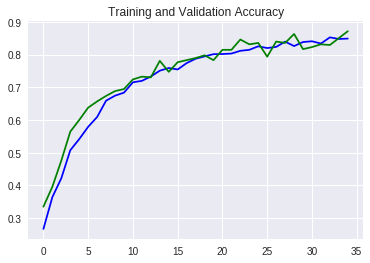

In [46]:
# plot training accuracies
plt.plot(history_A.history['acc'],'b') #train acc
plt.plot(history_A.history['val_acc'],'g') #val acc
plt.title('Training and Validation Accuracy model_A') 
plt.show()

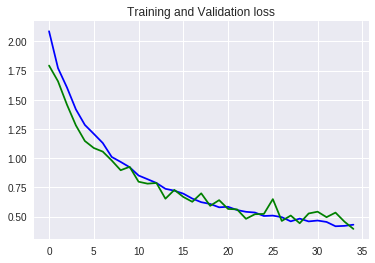

In [47]:
# plot training and validation loss
plt.plot(history_A.history['loss'],'b') #train loss
plt.plot(history_A.history['val_loss'],'g') #val loss
plt.title('Training and Validation loss model_A') 
plt.show()

The results of  model_A are a validation accuracy of 87% and an error rate of 13%.  The training and validation accuracies and losses converge nicely and there seems to be no overfitting.

## model_B - My model

The following model was designed using code from several sources such as Chollett (2018), NikKonst (2018), and  Kazachok (2018).  I tried several configurations, parameters, etc and settled on the configuration below.  My model consists of 5 conv layers followed by max pooling layers,  and 2 dense layers.  I tried adding batch normalization and dropout layers, but this did not improve performance.

In [17]:
model = Sequential() 
model.add(layers.Conv2D(80, (3, 3), activation='relu', input_shape=(scaleTo, scaleTo, 3), padding='same')) 
model.add(layers.MaxPooling2D((2, 2))) # to downsample the feature maps

model.add(layers.Conv2D(80, (3, 3), activation='relu'))
# model.add(BatchNormalization()) # normalize inputs, training converges faster, no help in this model
model.add(layers.MaxPooling2D((2, 2))) 
# model.add(Dropout(0.2)) # makes model smaller, reduces overfitting. No improvement seen with this.

model.add(layers.Conv2D(160, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(160, (3, 3), activation='relu'))
# model.add(BatchNormalization())

model.add(layers.Conv2D(240, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 
# model.add(Dropout(0.5))

model.add(layers.Flatten()) 
model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dense(75, activation='relu'))
model.add(layers.Dense(num_clases, activation='softmax'))

# adam = optimizers.Adam(lr=0.0001) I tried this learning rate but it did not improve performance
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_B = model
model_B.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 71, 71, 80)        2240      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 80)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 33, 33, 80)        57680     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 80)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 160)       115360    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 160)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 160)         230560    
__________

In [19]:
t0=time.time()
history_B = model_B.fit_generator(datagen.flow(trainX, trainY, batch_size=75), epochs=50, validation_data=(testX, testY), verbose=2)
t1=time.time()
print(t1-t0," seconds")

Epoch 1/50
 - 7s - loss: 1.3603 - acc: 0.5172 - val_loss: 1.2090 - val_acc: 0.5684
Epoch 2/50
 - 7s - loss: 1.2544 - acc: 0.5520 - val_loss: 1.0756 - val_acc: 0.6295
Epoch 3/50
 - 7s - loss: 1.1049 - acc: 0.6204 - val_loss: 1.0137 - val_acc: 0.6505
Epoch 4/50
 - 7s - loss: 0.9571 - acc: 0.6725 - val_loss: 0.8918 - val_acc: 0.7011
Epoch 5/50
 - 7s - loss: 0.8621 - acc: 0.7062 - val_loss: 0.7703 - val_acc: 0.7600
Epoch 6/50
 - 7s - loss: 0.7841 - acc: 0.7310 - val_loss: 0.8004 - val_acc: 0.7411
Epoch 7/50
 - 7s - loss: 0.7372 - acc: 0.7530 - val_loss: 0.7428 - val_acc: 0.7453
Epoch 8/50
 - 7s - loss: 0.6845 - acc: 0.7649 - val_loss: 0.6943 - val_acc: 0.7642
Epoch 9/50
 - 7s - loss: 0.6173 - acc: 0.7876 - val_loss: 0.6331 - val_acc: 0.8021
Epoch 10/50
 - 7s - loss: 0.5845 - acc: 0.7998 - val_loss: 0.6888 - val_acc: 0.7811
Epoch 11/50
 - 7s - loss: 0.5800 - acc: 0.7956 - val_loss: 0.5924 - val_acc: 0.8042
Epoch 12/50
 - 7s - loss: 0.5407 - acc: 0.8021 - val_loss: 0.6507 - val_acc: 0.8042
E

### Loss and Accuracy for model_B

In [20]:
# Final evaluation of the model
scores = model_B.evaluate(testX, testY, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 13.47%


In [21]:
print(model_B.evaluate(trainX, trainY))  # Evaluate on train set
print(model_B.evaluate(testX, testY))  # Evaluate on test set

4275/4275 [==============================] - 2s 413us/step
[0.2894295614365249, 0.8872514621137876]
475/475 [==============================] - 0s 406us/step
[0.3905953272392875, 0.8652631582711873]


### Plots for model_B

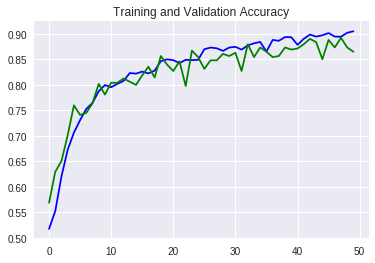

In [22]:
# plot training accuracies
plt.plot(history_B.history['acc'],'b') #train acc
plt.plot(history_B.history['val_acc'],'g') #val acc
plt.title('Training and Validation Accuracy') 
plt.show()

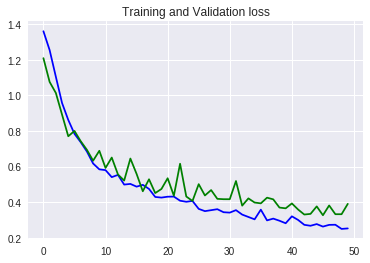

In [23]:
# plot training and validation loss
plt.plot(history_B.history['loss'],'b') #train loss
plt.plot(history_B.history['val_loss'],'g') #val loss
plt.title('Training and Validation loss') 
plt.show()

The results of my model include a baseline error rate of 13% , a validation accuracy of 87% with very little overfitting.  The performance of my model was worse with batch normalization and dropout layers, resulting in an error rate of 18% and a validation accuracy of 82%.  These layers also increased overfitting in the plots.  The batch normalization and dropout layers were commented out in the final version.

## Class Functional API Inception 1 and 2 models

Experimentation was done using the functional API models from my deep learning class (Kim, 2018).  The "inception1" and "inception2" functions were used to build functional API Model1 and Model2.  Each Model was then tested on the seedling data.

In [0]:
# The following code was taken from my Deep Learning course by Kim, (2018)
# Hint: use the Concatenate as in the import layers above
# Hint: MaxPoolng2D needs 1x1 strides and same padding to match the spatial dimension

def inception1(x, n = 32):
    p1 = Conv2D(n, 1, activation ='relu', padding='same')(x)
    p2 = Conv2D(n, 3, activation ='relu', padding='same')(x)
    p3 = Conv2D(n, 5, activation ='relu', padding='same')(x)
    p4 = MaxPooling2D((3,3), strides=(1, 1), padding='same')(x)
    c =  Concatenate(axis=-1)([p1,p2,p3,p4])
    return c

In [55]:
trainX.shape

(4275, 71, 71, 3)

In [0]:
x = Input(shape=(71,71,3))

In [0]:
# The following code was taken from my Deep Learning course by Kim, (2018)
def inception2(x, n = 32):
    p1 = Conv2D(n, 1, activation ='relu', padding='same')(x)
    p2 = Conv2D(n, 1, activation ='relu', padding='same')(x)
    p2 = Conv2D(n, 3, activation ='relu', padding='same')(p2)
    p3 = Conv2D(n, 1, activation ='relu', padding='same')(x)
    p3 = Conv2D(n, 5, activation ='relu', padding='same')(p3)
    p4 = MaxPooling2D((3,3), strides=(1, 1), padding='same')(x)
    p4 = Conv2D(n, 1, activation ='relu', padding='same')(p4)
    c =  Concatenate(axis=-1)([p1,p2,p3,p4])
    return c

## API model1 

Model1 from our homework assignment consist of  the "inception1" function repeated twice for 6 conv layers, maxpooling layers,  followed by 2 dense layers.

In [0]:
## input-inception1-maxpool(2x2)-inception1-maxpool(2x2)-dense(128)-output

def model1():
    inputs = Input(trainX.shape[1:])
    i1 = inception1(inputs)
    mp1 = MaxPooling2D((2,2))(i1)
    i2 = inception1(mp1)
    mp2 = MaxPooling2D((2,2))(i2) 
    f = Flatten()(mp2)
    d = Dense(128, activation='relu')(f)
    out = Dense(12, activation='softmax')(d)
    model = Model(inputs, out)
    return model

In [59]:
model1 = model1()
model1.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 71, 71, 3)    0                                            
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 71, 71, 32)   128         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 71, 71, 32)   896         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 71, 71, 32)   2432        input_2[0][0]                    
__________________________________________________________________________________________________
max_poolin

Epoch 1/35
 - 9s - loss: 1.9979 - acc: 0.3277 - val_loss: 1.5193 - val_acc: 0.4842
Epoch 2/35
 - 8s - loss: 1.3920 - acc: 0.5226 - val_loss: 1.2821 - val_acc: 0.5579
Epoch 3/35
 - 9s - loss: 1.1393 - acc: 0.6133 - val_loss: 1.0364 - val_acc: 0.6421
Epoch 4/35
 - 9s - loss: 1.0329 - acc: 0.6508 - val_loss: 0.9930 - val_acc: 0.6232
Epoch 5/35
 - 9s - loss: 0.9540 - acc: 0.6868 - val_loss: 0.9716 - val_acc: 0.6674
Epoch 6/35
 - 9s - loss: 0.8762 - acc: 0.7055 - val_loss: 0.9184 - val_acc: 0.7053
Epoch 7/35
 - 9s - loss: 0.8254 - acc: 0.7263 - val_loss: 0.9606 - val_acc: 0.6926
Epoch 8/35
 - 9s - loss: 0.7740 - acc: 0.7462 - val_loss: 0.7906 - val_acc: 0.7221
Epoch 9/35
 - 9s - loss: 0.7458 - acc: 0.7542 - val_loss: 1.0344 - val_acc: 0.6779
Epoch 10/35
 - 9s - loss: 0.7303 - acc: 0.7537 - val_loss: 0.6238 - val_acc: 0.7726
Epoch 11/35
 - 9s - loss: 0.6790 - acc: 0.7733 - val_loss: 0.7899 - val_acc: 0.7347
Epoch 12/35
 - 9s - loss: 0.6455 - acc: 0.7857 - val_loss: 0.6729 - val_acc: 0.7537
E

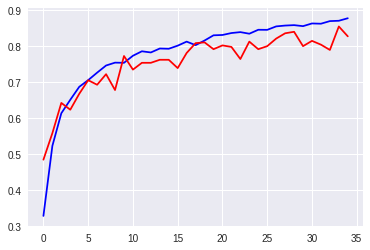

In [60]:
adam = Adam(lr=0.001)
model1.compile(loss= 'categorical_crossentropy' , optimizer= adam , metrics=[ 'accuracy' ])

# Fit the model
t0=time.time()
log1 = model1.fit_generator(datagen.flow(trainX, trainY, batch_size=75), epochs=35, validation_data=(testX, testY), verbose=2)
t1=time.time()
print(t1-t0," seconds")

# Final evaluation of the model
scores = model1.evaluate(testX, testY, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(log1.history['acc'],'b') 
plt.plot(log1.history['val_acc'],'r')
plt.show()

### Accuracy for model1

In [61]:
print(model1.evaluate(trainX, trainY))  # Evaluate on train set
print(model1.evaluate(testX, testY))  # Evaluate on test set

4275/4275 [==============================] - 2s 569us/step
[0.38520202714797347, 0.8584795321498001]
475/475 [==============================] - 0s 554us/step
[0.5403480818397121, 0.8273684226839166]


The baseline loss for Model1 is 17% and the validation accuracy is 83%.  There is also more overfitting.  This model did not perform as well as the first two models.

##  API model2 

Model2 was taken from the Deep Learning Class (Kim, 2018). It consists of the "inception2" function repeated twice for a total of 8 conv layers with maxpooling layers in between and 2 dense layers.  I also used the functions from class to iterate through various learning rates outside of the default parameters and number of epochs to find the best number for each of these parameters.  This process was done on the training accuracy.

In [0]:
## input-inception2-maxpool(2x2)-inception2-maxpool(2x2)-dense(128)-output

def model2():
    inputs = Input(trainX.shape[1:])
    i1 = inception2(inputs)
    mp1 = MaxPooling2D((2,2))(i1)
    i2 = inception2(mp1)
    mp2 = MaxPooling2D((2,2))(i2) 
    f = Flatten()(mp2)
    d = Dense(128, activation='relu')(f)
    out = Dense(12, activation='softmax')(d)
    model = Model(inputs, out)
    return model
  
def train(model, lr=0.001, batch=75, epochs=20):
    adam = optimizers.Adam(lr=lr) 
    model.compile(optimizer=adam, loss ='categorical_crossentropy', metrics=['accuracy'])
    result = model.fit_generator(datagen.flow(trainX, trainY, batch_size=batch), epochs=epochs, validation_data=(testX, testY), verbose=0)

    # result = model.fit(trainX, trainY, batch_size=batch, epochs=epochs, verbose=0)
    return result.history

In [73]:
for ep in [10,20,50,100,200]:
    for lr in [0.1,0.01,0.001,0.0001,0.00001]:
        model = model2()
        res = train(model,lr,ep)
        print(ep,lr,np.argmax(res['acc']),'{:.3f}'.format(max(res['acc'])))

10 0.1 15 0.060
10 0.01 13 0.143
10 0.001 17 0.891
10 0.0001 18 0.819
10 1e-05 19 0.657
20 0.1 5 0.129
20 0.01 17 0.685
20 0.001 19 0.891
20 0.0001 18 0.786
20 1e-05 19 0.618
50 0.1 16 0.100
50 0.01 16 0.634
50 0.001 19 0.881
50 0.0001 18 0.759
50 1e-05 19 0.568
100 0.1 16 0.109
100 0.01 18 0.719
100 0.001 19 0.865
100 0.0001 19 0.724
100 1e-05 19 0.500
200 0.1 16 0.129
200 0.01 17 0.799
200 0.001 19 0.843
200 0.0001 19 0.698
200 1e-05 19 0.441


The output above shows that the learning rate of 0.001 had the best training performance.  The epochs with the highest training accuracy ranged from 10-20, with performance declining at 50 epochs.  I use 35 epochs to fit model2.

In [0]:
def model2():
    inputs = Input(trainX.shape[1:])
    i1 = inception2(inputs)
    mp1 = MaxPooling2D((2,2))(i1)
    i2 = inception2(mp1)
    mp2 = MaxPooling2D((2,2))(i2) 
    f = Flatten()(mp2)
    d = Dense(128, activation='relu')(f)
    out = Dense(12, activation='softmax')(d)
    model = Model(inputs, out)
    return model

In [32]:
model2 = model2()
model2.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 71, 71, 3)    0                                            
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 71, 71, 32)   128         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 71, 71, 32)   128         input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_8 (MaxPooling2D)  (None, 71, 71, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_12 

Epoch 1/35
 - 12s - loss: 1.8907 - acc: 0.3698 - val_loss: 1.2915 - val_acc: 0.5579
Epoch 2/35
 - 10s - loss: 1.3069 - acc: 0.5654 - val_loss: 1.1522 - val_acc: 0.6189
Epoch 3/35
 - 9s - loss: 1.0727 - acc: 0.6503 - val_loss: 1.0654 - val_acc: 0.6400
Epoch 4/35
 - 9s - loss: 0.9719 - acc: 0.6830 - val_loss: 0.8194 - val_acc: 0.7263
Epoch 5/35
 - 9s - loss: 0.8695 - acc: 0.7095 - val_loss: 0.6761 - val_acc: 0.7811
Epoch 6/35
 - 9s - loss: 0.7717 - acc: 0.7450 - val_loss: 0.6487 - val_acc: 0.7811
Epoch 7/35
 - 9s - loss: 0.7037 - acc: 0.7649 - val_loss: 0.6722 - val_acc: 0.7768
Epoch 8/35
 - 9s - loss: 0.6900 - acc: 0.7705 - val_loss: 0.6275 - val_acc: 0.7768
Epoch 9/35
 - 9s - loss: 0.6198 - acc: 0.7944 - val_loss: 0.6154 - val_acc: 0.8000
Epoch 10/35
 - 9s - loss: 0.5860 - acc: 0.8058 - val_loss: 0.5732 - val_acc: 0.7979
Epoch 11/35
 - 9s - loss: 0.5517 - acc: 0.8108 - val_loss: 0.4631 - val_acc: 0.8463
Epoch 12/35
 - 9s - loss: 0.5335 - acc: 0.8150 - val_loss: 0.5210 - val_acc: 0.8168

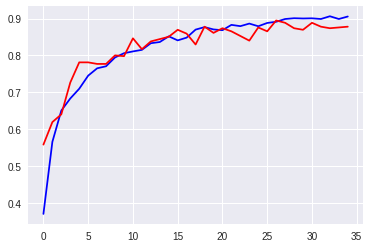

In [33]:
# training and obtaining error rate for model2
adam = Adam(lr=0.001)
model2.compile(loss= 'categorical_crossentropy' , optimizer= adam , metrics=[ 'accuracy' ])

# Fit the model
t0=time.time()
log2 = model2.fit_generator(datagen.flow(trainX, trainY, batch_size=75), epochs=35, validation_data=(testX, testY), verbose=2)
t1=time.time()
print(t1-t0," seconds")

# Final evaluation of the model
scores2 = model2.evaluate(testX, testY, verbose=0)
print("CNN Error: %.2f%%" % (100-scores2[1]*100))

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(log2.history['acc'],'b') 
plt.plot(log2.history['val_acc'],'r')
plt.show()

### Acurracy for model2

In [34]:
print(model2.evaluate(trainX, trainY))  # Evaluate on train set
print(model2.evaluate(testX, testY))  # Evaluate on test set

4275/4275 [==============================] - 4s 831us/step
[0.22417977211768167, 0.9148538012253611]
475/475 [==============================] - 0s 787us/step
[0.3425717953004335, 0.8778947384733903]


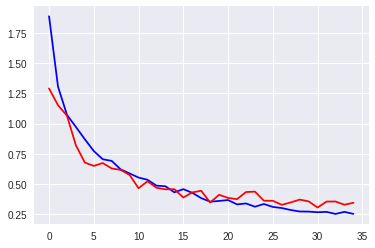

In [35]:
plt.plot(log2.history['loss'],'b') 
plt.plot(log2.history['val_loss'],'r')
plt.show()

Model2 has a loss rate of 12% and a validation accuracy of 88%.  The plots show little overfitting.

## NikKonst (2018) Model

The following model was develped by NikKonst (2018) and was found on the Kaggle website.  This model consisted of 6 conv layers and three fully-connected layers. His filters were [64,64, 128,128, 256,256].  Maxpool layers occurred after each pair of conv layers.  Batch normalization and dropout layers of were used.  This model took 7-8 hours to train.

In [62]:
# this model taken from NikKonst (2018) at https://www.kaggle.com/nikkonst/plant-seedlings-with-cnn-and-image-processing

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(scaleTo, scaleTo, 3), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_clases, activation='softmax'))
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_N = model
model_N.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 67, 67, 64)        4864      
_________________________________________________________________
batch_normalization_9 (Batch (None, 67, 67, 64)        256       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 63, 63, 64)        102464    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 31, 31, 64)        256       
_________________________________________________________________
dropout_6 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 27, 27, 128)       204928    
__________

In [63]:
# I ran the code for ReduceLROnPlateau earlier, but the run time was extremely long and I did not see much improvement in performance.
# from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

# documentation for ReduceLROnPlateau at https://keras.io/callbacks/
# learning rate reduction
# learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.4, min_lr=0.00001) 

# checkpoints I did not try this for this project.
# filepath="drive/My Drive/DLproject/seedlingsToColab/weights.best_{epoch:02d}-{val_acc:.2f}.hdf5"
# checkpoint = ModelCheckpoint(filepath, monitor='val_acc', 
#                              verbose=1, save_best_only=True, mode='max')
# filepath="drive/My Drive/DLproject/seedlingsToColab/weights.last_auto4.hdf5"
# checkpoint_all = ModelCheckpoint(filepath, monitor='val_acc', 
#                                  verbose=1, save_best_only=False, mode='max')

# all callbacks
# callbacks_list = [checkpoint, learning_rate_reduction, checkpoint_all]
# callbacks_list = [learning_rate_reduction ]

# fit model
t0=time.time()
history_N = model_N.fit_generator(datagen.flow(trainX, trainY, batch_size=75), epochs=35, validation_data=(testX, testY), steps_per_epoch=trainX.shape[0])
t1=time.time()
print(t1-t0," seconds")

Epoch 1/35
4275/4275 [==============================] - 783s 183ms/step - loss: 0.5244 - acc: 0.8216 - val_loss: 0.4261 - val_acc: 0.8632
Epoch 2/35
4275/4275 [==============================] - 778s 182ms/step - loss: 0.1855 - acc: 0.9296 - val_loss: 0.2730 - val_acc: 0.9074
Epoch 3/35
4275/4275 [==============================] - 779s 182ms/step - loss: 0.1310 - acc: 0.9497 - val_loss: 0.2208 - val_acc: 0.9284
Epoch 4/35
4275/4275 [==============================] - 778s 182ms/step - loss: 0.1005 - acc: 0.9613 - val_loss: 0.3454 - val_acc: 0.9011
Epoch 5/35
4275/4275 [==============================] - 778s 182ms/step - loss: 0.0802 - acc: 0.9695 - val_loss: 0.3527 - val_acc: 0.9116
Epoch 6/35
4275/4275 [==============================] - 779s 182ms/step - loss: 0.0655 - acc: 0.9754 - val_loss: 0.3572 - val_acc: 0.9074
Epoch 7/35
4275/4275 [==============================] - 770s 180ms/step - loss: 0.0561 - acc: 0.9789 - val_loss: 0.2919 - val_acc: 0.9242
Epoch 8/35
4275/4275 [============

### Loss and Accuracy for  model_N

In [64]:
# Final evaluation of the model
scores = model_N.evaluate(testX, testY, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))


Baseline Error: 8.00%


In [65]:
print(model_N.evaluate(trainX, trainY))  # Evaluate on train set
print(model_N.evaluate(testX, testY))  # Evaluate on test set

4275/4275 [==============================] - 4s 947us/step
[0.04429441918106341, 0.9885380116959064]
475/475 [==============================] - 0s 934us/step
[0.46558146981816545, 0.9200000003764504]


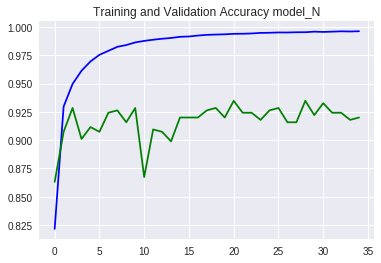

In [66]:
plt.plot(history_N.history['acc'],'b') #train acc
plt.plot(history_N.history['val_acc'],'g') #val acc
plt.title('Training and Validation Accuracy model_N') 
plt.show()

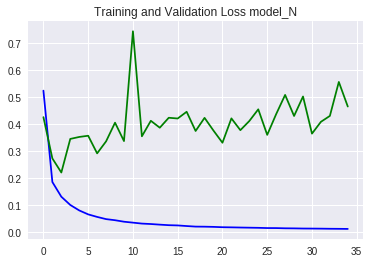

In [67]:
# plot training and validation loss
plt.plot(history_N.history['loss'],'b') #train loss
plt.plot(history_N.history['val_loss'],'g') #val loss
plt.title('Training and Validation Loss model_N') 
plt.show()

The plots for the model by NikKonst (2018) are shown above and demonstrate more overfitting for both the accuracy and loss scores.  The baseline error rate is 8% and the training accuracy is 92%.

## Pretrained VGG convet

The last model tested is the VGG16 model from keras.  This model includes pretrained weights from Imagenet.  The code for this process was taken from Chollet (2018), Chapter 5 section 3 on using Pretrained Models.

In [14]:
# code taken from Chollet, (2018)
from keras.applications import VGG16 
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(71,71,3) )
conv_base.summary()

58892288/58889256 [==============================] - 2s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 71, 71, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 71, 71, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 71, 71, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 35, 35, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 35, 35, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 35, 35, 128)       147584    
_________________________________________________________________
block2_pool

In [15]:
# code from Chollet, (2018)
from keras import models 
from keras import layers
model = models.Sequential() 
model.add(conv_base) 
model.add(layers.Flatten()) 
model.add(layers.Dense(256, activation='relu')) 
model.add(layers.Dense(12, activation='softmax'))

model_VGG = model
model_VGG.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               524544    
_________________________________________________________________
dense_2 (Dense)              (None, 12)                3084      
Total params: 15,242,316
Trainable params: 15,242,316
Non-trainable params: 0
_________________________________________________________________


In [16]:
print('This is the number of trainable weights ' 'before freezing the conv base:', len(model_VGG.trainable_weights)) 
conv_base.trainable = False
print('This is the number of trainable weights ' 'after freezing the conv base:', len(model_VGG.trainable_weights)) 


This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [0]:
# compile model
model_VGG.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
t0=time.time()
history_VGG = model_VGG.fit_generator(datagen.flow(trainX, trainY, batch_size=75), epochs=35, validation_data=(testX, testY), steps_per_epoch=trainX.shape[0])
t1=time.time()
print(t1-t0," seconds")

# Final evaluation of the model
scores = model_VGG.evaluate(testX, testY, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))



Epoch 1/35
4275/4275 [==============================] - 623s 146ms/step - loss: 0.5618 - acc: 0.7952 - val_loss: 0.5001 - val_acc: 0.8147
Epoch 2/35
4275/4275 [==============================] - 623s 146ms/step - loss: 0.3932 - acc: 0.8508 - val_loss: 0.5184 - val_acc: 0.8189
Epoch 3/35
4275/4275 [==============================] - 629s 147ms/step - loss: 0.3429 - acc: 0.8681 - val_loss: 0.5715 - val_acc: 0.8126
Epoch 4/35
4275/4275 [==============================] - 633s 148ms/step - loss: 0.3095 - acc: 0.8801 - val_loss: 0.5606 - val_acc: 0.8232
Epoch 5/35
4275/4275 [==============================] - 637s 149ms/step - loss: 0.2874 - acc: 0.8880 - val_loss: 0.6035 - val_acc: 0.8042
Epoch 6/35
4275/4275 [==============================] - 654s 153ms/step - loss: 0.2724 - acc: 0.8933 - val_loss: 0.5715 - val_acc: 0.8274
Epoch 7/35
4275/4275 [==============================] - 641s 150ms/step - loss: 0.2585 - acc: 0.8988 - val_loss: 0.5173 - val_acc: 0.8379
Epoch 8/35
4275/4275 [============

### Accuracy for model_VGG

In [19]:
print(model_VGG.evaluate(trainX, trainY))  # Evaluate on train set
print(model_VGG.evaluate(testX, testY))  # Evaluate on test set

4275/4275 [==============================] - 7s 2ms/step
[0.17762676069610997, 0.9321637426203454]
475/475 [==============================] - 1s 1ms/step
[0.6697807891745317, 0.8336842112792165]


### Plots for model_VGG

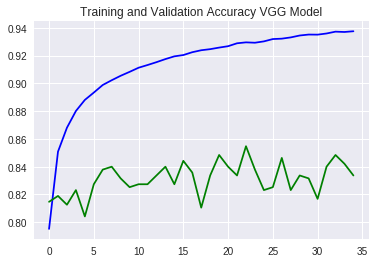

In [20]:
plt.plot(history_VGG.history['acc'],'b') #train acc
plt.plot(history_VGG.history['val_acc'],'g') #val acc
plt.title('Training and Validation Accuracy VGG Model') 
plt.show()

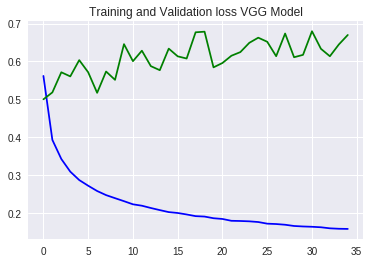

In [21]:
# plot training and validation loss
plt.plot(history_VGG.history['loss'],'b') #train loss
plt.plot(history_VGG.history['val_loss'],'g') #val loss
plt.title('Training and Validation loss VGG Model') 
plt.show()

The pretrained VGG model had baseline error rate of 17%, a validation accuracy of 83% and significant overfitting.  This model appears too complex for the small dataset.

# Discussion

A comparsion chart on all the models tested for this project are listed below.

Model | Conv Layers | % Error | % Valid. Acc. | Seconds | Train. Parameters
:--- | :--- | :--- | :--- | :--- | :--- | ---:
model_N |  [64,64, 128,128, 256,256] | 8 | 92 | 26,586 | 3,317,580
model2 | inception2 layers | 12 | 88 | 330 | 4,823,436
model_A | [32,64,128,128] | 13 | 87 | 259 | 274,444
model_B | [80,80,160,160,240] | 13 | 87 | 355 | 784,076
model1 | inception1 layers | 17 | 83 | 301 | 7,329,548
VGG16 | VGG16 layers | 17 | 83 | 21,521 | 15,242,316


In this project, six CNN models were tested on the plant seedling training data from Kaggle. The models ranged from simple to complex with the VGG16 being the largest model with 15 million trainable parameters.  The VGG16 was the only pretrained model used in this project.

The model that performed the best during this project was the model_N by NikKonst (2018).  This model had a baseline error rate of 8% and a validation accuracy of 92%.  However, there was significant overfitting observed on the plots, which was surprising since it included batch normalization and dropout layers.  

Model2 had the second lowest error rate at 12% and less overfitting on the accuracy and loss plots.  This model has a few more convolution layers as compared to model_N, but no batch normalization or dropout layers.  This model may have better generalization on new data since there is less overfitting and was used for the Kaggle test data submission.  

The models that performed the best contained trainable parameters in the 3-5 million range and may be an indication of the optimal model capacity for this dataset .  The models with parameters lower or higher than this range did not perform as well.  

Chollet (2018, p 105) also mentioned that "There is a compromise to be found between too much capacity and not enough capacity."  He recommends evaluating few layers and parameters first and increasing the number of parameters until you can find the model with optimal performance.

A factor that did improved accuracy for most of the models in this project was the masking technique to remove background images. Several of the same CNN models were tried without the masking technique, and all of them resulted in worse metrics and much longer run times. 

A review of Kaggle competitors shows that better results were obtained with the plant seedling data by others. The two highest results I found were from Kazachok (2018) with 97% accuracy and NikKonst (2018) at 96% accuracy. Both individuals used pretrained weights to improve their accuracy.

There are other options available that may improve the metrics I obtained. The first one is to save the best weights from the initial training as done by Kazachok (2018) and NikKonst (2018) and use these pretrained weights in the final training model. However, due to time constraints, I did not venture into this technique.

Another option to improve the metrics of CNN models would be to try a different image size. One could also fine-tune the image data generator or other parameters used in the training process. I did experiment with many variations in the hyperparameters, and regularization, and settled on the ones presented in this paper.

Overall, this project was extremely educational and fun. Going through the entire process of developing and comparing CNN models from start to finish was very beneficial.



# Submission to Kaggle

The model used to predict the labels for test data on Kaggle is model2 because it had the second best error rate of 12% and less overfitting than model_N.  Hopefully, with less overfitting, the model will generalize well to the Kaggle test images.  Processing the images for the this data is the same as that used for the training data.

total images: 794
working on file: 1
working on file: 2
working on file: 3
working on file: 4
working on file: 5
working on file: 6
working on file: 7
working on file: 8
working on file: 9
working on file: 10
working on file: 11
working on file: 12
working on file: 13
working on file: 14
working on file: 15
working on file: 16
working on file: 17
working on file: 18
working on file: 19
working on file: 20
working on file: 21
working on file: 22
working on file: 23
working on file: 24
working on file: 25
working on file: 26
working on file: 27
working on file: 28
working on file: 29
working on file: 30
working on file: 31
working on file: 32
working on file: 33
working on file: 34
working on file: 35
working on file: 36
working on file: 37
working on file: 38
working on file: 39
working on file: 40
working on file: 41
working on file: 42
working on file: 43
working on file: 44
working on file: 45
working on file: 46
working on file: 47
working on file: 48
working on file: 49
working on 

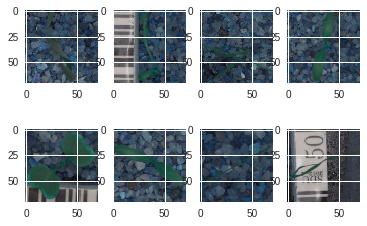

In [52]:
# code from NikKonst (2018)

# files = glob(test_path)
files = os.listdir( testPath ) 
testImg = []
testId = []
j = 1
num = len(files)
print("total images: "+str(num))

# Obtain images and resizing, obtain labels
for img in files:
  print("working on file: " + str(j))
  img = testPath + img
  print("Obtain images: " + str(j) + "/" + str(num), end='\r')
  testId.append(img.split('/')[-1])  # Images id's
  testImg.append(cv2.resize(cv2.imread(img), (scaleTo, scaleTo)))
  j += 1

testImg = np.asarray(testImg)  # Train images set # create an array of all the images

for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(testImg[i])

In [54]:
testImg.shape

(794, 71, 71, 3)

In [53]:
type(testImg)

numpy.ndarray

### Apply mask technique to Kaggle testing images.

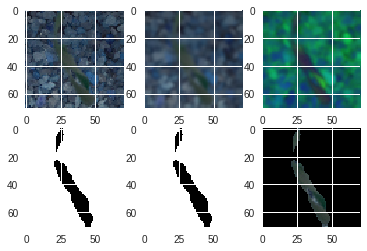

In [55]:
clearTestImg = []
examples = []; getEx = True
for img in testImg:
  
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)   
    
    # Convert to HSV image
    hsvImg = cv2.cvtColor(blurImg, cv2.COLOR_BGR2HSV)  
    
    # Create mask (parameters - green color range)
    lower_green = (25, 40, 50)
    upper_green = (75, 255, 255)
    mask = cv2.inRange(hsvImg, lower_green, upper_green)  
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    # Create bool mask
    bMask = mask > 0  
    
    # Apply the mask
    clear = np.zeros_like(img, np.uint8)  # Create empty image
    clear[bMask] = img[bMask]  # Apply boolean mask to the origin image
    
    clearTestImg.append(clear)  # Append image without backgroung
    
    # Show examples
    if getEx:
        plt.subplot(2, 3, 1); plt.imshow(img)  # Show the original image
        plt.subplot(2, 3, 2); plt.imshow(blurImg)  # Blur image
        plt.subplot(2, 3, 3); plt.imshow(hsvImg)  # HSV image
        plt.subplot(2, 3, 4); plt.imshow(mask)  # Mask
        plt.subplot(2, 3, 5); plt.imshow(bMask)  # Boolean mask
        plt.subplot(2, 3, 6); plt.imshow(clear)  # Image without background
        getEx = False

clearTestImg = np.asarray(clearTestImg)

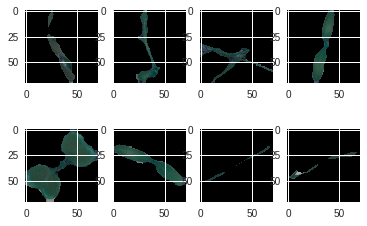

In [56]:
# Show sample result
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(clearTestImg[i])

In [0]:
# normalize Kaggle testing images
clearTestImg = clearTestImg / 255



In [0]:
# predict on Kaggle testing images
pred = model2.predict(clearTestImg)


In [0]:
# Write result to file.  Code from NikKonst (2018)
predNum = np.argmax(pred, axis=1)
predStr = le.classes_[predNum]

res = {'file': testId, 'species': predStr}
res = pd.DataFrame(res)
res.to_csv("/content/drive/My Drive/DLproject/seedlingsToColab/res.csv", index=False)

# References

Chollet, F. (2018).  Deep Learning with Python.  Shelter Island, NY. Manning Publications Co.

CoLab Drive FUSE example.ipynb (2018) Retrieved from https://colab.research.google.com/drive/1srw_HFWQ2SMgmWIawucXfusGzrj1_U0q.

Kaggle (2018).  Retrieved from https://www.kaggle.com/c/plant-seedlings-classification/data.

Kazachok, M. (2018). Keras simple model (0.97103 Best Public Score).  Retrieved from https://www.kaggle.com/miklgr500/keras-simple-model-0-97103-best-public-score

Kim, G. (2018). Regis Course 686 Deep Learning Class homework solutions

NikKonst (2018). Plant seedlings with cnn and image processing.  Retrieved from https://www.kaggle.com/nikkonst/plant-seedlings-with-cnn-and-image-processing


